In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

np.random.seed(42)

In [2]:
def euclideanDist(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [3]:
class KMeans:
    def __init__(self, K=5, maxIters=100, plotSteps=False):
        self.K = K                  # Number of clusters       
        self.plotSteps = plotSteps  # To plot the intermediate clustering if necessary
        self.maxIters = maxIters    # Maximum number of iterations the algorithm is allowed to run if it hasn't converged yet

        # The centers (mean feature vector) for each cluster
        self.centroids = []

        # List of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

    def predict(self, data):
        self.data = data
        self.nSamples, self.nFeatures = data.shape
        # nSamples will hold the number of data points available while nFeatures will hold the number of features each point has
        # Eg: If we are clustering points on a 2D plane, nFeatures will be 2 (its x and y coordinates)

        # Initialize the centroids randomly
        randomSampleIndices = np.random.choice(self.nSamples, self.K, replace=False)
        self.centroids = [self.data[index] for index in randomSampleIndices]

        # Optimize the clusters iteratively
        for iteration in range(self.maxIters):
            start = time.time()
            
            # Assign samples to closest centroids (creating new clusters)
            self.clusters = self.createClusters(self.centroids)

            if self.plotSteps: self.plot()

            # Calculate new centroids from the newly generated clusters
            centroidsOld = self.centroids
            self.centroids = self.getCentroids(self.clusters)

            print(f"Iteration {iteration} finished in {time.time() - start} s")
            
            # Check if clusters have changed (checking for convergence)
            if self.isConverged(centroidsOld, self.centroids):
                # Calculate the mean distance of each point to its nearest centroid
                meanDist = self.calcMeanDist(self.centroids)
                print(f"Converged at iteration {iteration}")
                break

            if self.plotSteps:
                self.plot()

        # Classify samples as the index of their clusters
        return self.getClusterLabels(self.clusters), meanDist, [len(i) for i in self.clusters]

    def getClusterLabels(self, clusters):
        # Each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.nSamples)

        for clusterIndex, cluster in enumerate(clusters):
            for sampleIndex in cluster:
                labels[sampleIndex] = clusterIndex
        return labels

    def createClusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for index, sample in enumerate(self.data):
            clusters[self.closestCentroid(sample, centroids)].append(index)
        return clusters

    def closestCentroid(self, sample, centroids):
        return np.argmin([euclideanDist(sample, point) for point in centroids])

    def getCentroids(self, clusters):
        # Assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.nFeatures))
        for clusterIndex, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.data[cluster], axis=0)
            centroids[clusterIndex] = cluster_mean
        return centroids

    def isConverged(self, centroidsOld, centroids):
        # If there is no change in the centroids, the algorithm has converged
        return sum([euclideanDist(centroidsOld[i], centroids[i]) for i in range(self.K)]) == 0 

    def calcMeanDist(self, centroids):
        # Calculatin the mean distance of every data point to its nearest centroid
        ret = 0
        for index in range(self.K):
            ret += np.sum([euclideanDist(self.data[point], centroids[index]) for point in self.clusters[index]])
        return ret/self.nSamples

    def plot(self):
        fig, ax = plt.subplots()
        for i, index in enumerate(self.clusters):
            point = self.data[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=4)
        plt.show()

(500, 2)
3
Iteration 0 finished in 0.02043318748474121 s
Iteration 1 finished in 0.021211862564086914 s
Iteration 2 finished in 0.023867368698120117 s
Iteration 3 finished in 0.020693540573120117 s
Iteration 4 finished in 0.0232698917388916 s
Iteration 5 finished in 0.023856163024902344 s
Converged at iteration 5

Mean distance to nearest hotel is 1.2284674297271683 m
Load on the hotels: [169, 164, 167]


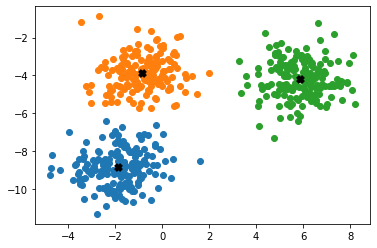

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers = 3, n_samples = 500, n_features = 2, shuffle = True, random_state = 40)
print(X.shape)
clusters = len(np.unique(y))
print(clusters)
k = KMeans(K=clusters, maxIters=150)#, plotSteps=True)
yPred = k.predict(X)

print(f"\nMean distance to nearest hotel is {yPred[-2]} m")
print(f"Load on the hotels: {yPred[-1]}") # Number of points in each cluster
k.plot()

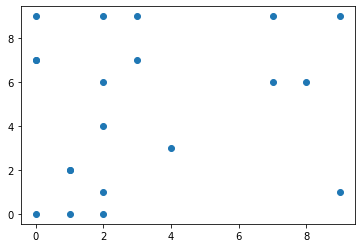

In [5]:
X = np.random.randint(0, 10, (20,2))
plt.scatter(X[:,0], X[:,1])
plt.show()

Iteration 0 finished in 0.011950016021728516 s
Iteration 1 finished in 0.0027914047241210938 s
Iteration 2 finished in 0.002048015594482422 s
Iteration 3 finished in 0.001499176025390625 s
Iteration 4 finished in 0.0010025501251220703 s
Iteration 5 finished in 0.0009849071502685547 s
Iteration 6 finished in 0.0013856887817382812 s
Converged at iteration 6

Mean distance to nearest hotel is 1.8746891722110384 m
Load on the hotels: [7, 5, 8]


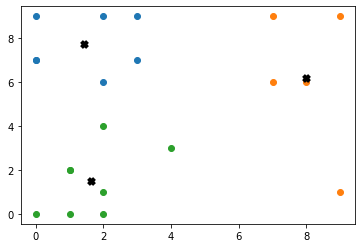

In [6]:
k = KMeans(K = 3, maxIters = 150)#, plotSteps=True)
yPred = k.predict(X)
print(f"\nMean distance to nearest hotel is {yPred[-2]} m")
print(f"Load on the hotels: {yPred[-1]}") # Number of points in each cluster
k.plot()

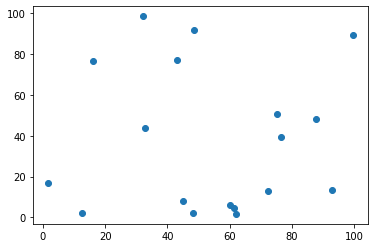

In [7]:
X = np.array([[62.08163698,  1.67526784],
     [32.24315999, 98.58400656],
     [99.59866588, 89.32291673],
     [93.01760265, 13.26561023],
     [12.54204163,  2.23864642],
     [72.26615516, 12.67184626],
     [48.23695677,  1.88363246],
     [75.4019112 , 50.68404206],
     [16.03161974, 76.65677029],
     [48.55756469, 92.03835838],
     [32.89457367, 43.99572953],
     [45.05027489,  7.90800872],
     [76.3974131 , 39.37101083],
     [ 1.71091021, 16.70646552],
     [61.35792552,  4.35550253],
     [43.0529087 , 77.02166012],
     [60.02364432,  6.26696287],
     [87.89562302, 48.28379983]])
plt.scatter(X[:,0], X[:,1])
plt.show()

Iteration 0 finished in 0.0022368431091308594 s
Iteration 1 finished in 0.0013153553009033203 s
Converged at iteration 1

Mean distance to nearest hotel is 21.23832399369202 m
Load on the hotels: [4, 10, 4]


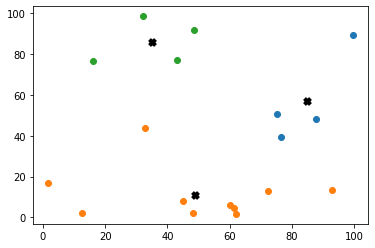

In [10]:
k = KMeans(K = 3, maxIters = 150)#, plotSteps=True)
yPred = k.predict(X)
print(f"\nMean distance to nearest hotel is {yPred[-2]} m")
print(f"Load on the hotels: {yPred[-1]}") # Number of points in each cluster
k.plot()

Iteration 0 finished in 0.0017766952514648438 s
Iteration 1 finished in 0.002199411392211914 s
Converged at iteration 1

Mean distance to nearest hotel is 23.94659340984885 m
Load on the hotels: [4, 5, 9]


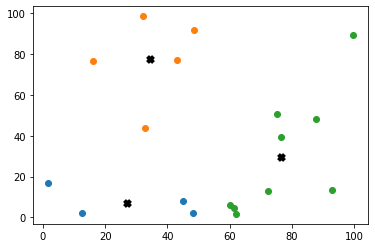

In [11]:
k = KMeans(K = 3, maxIters = 150)#, plotSteps=True)
yPred = k.predict(X)
print(f"\nMean distance to nearest hotel is {yPred[-2]} m")
print(f"Load on the hotels: {yPred[-1]}") # Number of points in each cluster
k.plot()